# Agregación de datos por categorías

Útil para llevar a cabo un análisis categorico y tomar decisiones en base a que categría pertenece un elemento del modelo.

In [99]:
import numpy as np
import pandas as pd

In [100]:
# Generar dummy dataframe
gender = ["Female", "Male"]
income = ["Poor", "Middle Class", "Rich"]

In [101]:
# Generación aleatoria de 500 datos
n = 500
gender_data = []
income_data = []

for i in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [102]:
# Distribuciones normales
# N(0, 1) = N(mu, ds) -> mu + ds * s
height = 160 + 30 * np.random.randn(n)
weight = 65 + 35 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
inc = 18000 + 3500 * np.random.randn(n) 

In [103]:
data = pd.DataFrame({
    'Gender': gender_data,
    'Economic Status': income_data,
    'Height': height,
    'Weight': weight,
    'Age': age,
    'Income': inc,
})

In [104]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,138.209195,25.852286,41.812149,20574.725197
1,Female,Rich,173.965542,103.027799,22.431003,16489.829759
2,Male,Middle Class,175.942595,61.609258,29.498286,15309.866907
3,Male,Rich,141.039922,87.990305,37.969720,14810.741947
4,Male,Middle Class,123.928023,45.857647,40.356139,16768.752061


## Agrupación de datos

In [105]:
grouped_gender = data.groupby("Gender")

In [106]:
grouped_gender.groups
# Indica a que fila pertenece cada grupo

{'Female': [1, 7, 8, 10, 11, 16, 19, 20, 23, 24, 25, 26, 30, 32, 39, 40, 44, 47, 48, 51, 52, 53, 55, 56, 57, 63, 68, 69, 71, 73, 75, 77, 78, 79, 80, 82, 86, 87, 88, 93, 98, 99, 100, 104, 105, 106, 109, 111, 113, 118, 119, 123, 127, 130, 131, 132, 133, 134, 135, 139, 140, 143, 145, 146, 148, 149, 151, 158, 160, 161, 162, 165, 166, 167, 169, 170, 171, 173, 175, 176, 177, 179, 180, 181, 183, 184, 186, 190, 191, 197, 201, 203, 204, 206, 207, 209, 210, 219, 221, 222, ...], 'Male': [0, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 17, 18, 21, 22, 27, 28, 29, 31, 33, 34, 35, 36, 37, 38, 41, 42, 43, 45, 46, 49, 50, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 70, 72, 74, 76, 81, 83, 84, 85, 89, 90, 91, 92, 94, 95, 96, 97, 101, 102, 103, 107, 108, 110, 112, 114, 115, 116, 117, 120, 121, 122, 124, 125, 126, 128, 129, 136, 137, 138, 141, 142, 144, 147, 150, 152, 153, 154, 155, 156, 157, 159, 163, 164, 168, 172, 174, 178, 182, 185, ...]}

In [107]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
1    Female            Rich  173.965542  103.027799  22.431003  16489.829759
7    Female            Rich  192.399296   93.837182  17.888766  20682.461628
8    Female            Rich  185.463409   48.752558  33.406231  21470.955579
10   Female            Poor  129.347679    6.748794  13.679111  17629.049560
11   Female            Rich  193.651543   43.435364  56.739518  22816.775004
..      ...             ...         ...         ...        ...           ...
490  Female    Middle Class  165.408846   62.792569  38.516884  18822.716822
491  Female            Rich  152.643898   90.297647  40.123018   9364.254961
493  Female            Poor  153.283123  101.752133  43.800506  17877.234085
498  Female    Middle Class  154.461709  115.823174  38.198718  23225.570879
499  Female            Rich  171.725837   68.048413  26.500272  20234.067954

[238 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [108]:
# Filtro de agrupación por un género
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Rich,173.965542,103.027799,22.431003,16489.829759
7,Female,Rich,192.399296,93.837182,17.888766,20682.461628
8,Female,Rich,185.463409,48.752558,33.406231,21470.955579
10,Female,Poor,129.347679,6.748794,13.679111,17629.049560
11,Female,Rich,193.651543,43.435364,56.739518,22816.775004
...,...,...,...,...,...,...
490,Female,Middle Class,165.408846,62.792569,38.516884,18822.716822
491,Female,Rich,152.643898,90.297647,40.123018,9364.254961
493,Female,Poor,153.283123,101.752133,43.800506,17877.234085
498,Female,Middle Class,154.461709,115.823174,38.198718,23225.570879


In [109]:
# Agrupación convinada por género y estatus económico
double_group = data.groupby(["Gender", "Economic Status"])
len(double_group)

6

In [110]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
20   Female    Middle Class  183.227541   38.449614  29.184042  14597.794597
23   Female    Middle Class  147.918475   95.210792  29.298325  19275.316566
24   Female    Middle Class  144.499789   49.613019  25.581603  14615.507612
39   Female    Middle Class  152.010655   86.014102   5.635457  20759.051788
57   Female    Middle Class  161.186732   77.254932  52.962022  19181.105246
..      ...             ...         ...         ...        ...           ...
458  Female    Middle Class  152.101410   76.052030  34.348261  18645.204670
473  Female    Middle Class  135.165530  123.881792  52.108321  12552.956941
482  Female    Middle Class  148.707410   64.754836  36.253005  17110.597645
490  Female    Middle Class  165.408846   62.792569  38.516884  18822.716822
498  Female    Middle Class  154.461709  115.823174  38.198718  23225.570879

[72 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [111]:
# Suma de los valores
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11600.989521  5186.991535  1932.300582  1.359885e+06
       Poor             11278.421719  4179.882532  2275.931492  1.226910e+06
       Rich             15640.811557  5716.480141  2733.245921  1.695742e+06
Male   Middle Class     14535.045809  5850.303104  2518.050458  1.624012e+06
       Poor             12310.833707  4953.659243  2021.450543  1.411239e+06
       Rich             14811.500895  5866.983961  2837.122336  1.677085e+06

In [112]:
# Promedio (media) de los valores
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     161.124854  72.041549  26.837508  18887.293514
       Poor             161.120310  59.712608  32.513307  17527.279963
       Rich             162.925120  59.546668  28.471312  17663.974580
Male   Middle Class     157.989628  63.590251  27.370114  17652.308625
       Poor             161.984654  65.179727  26.598033  18568.938308
       Rich             157.569158  62.414723  30.182153  17841.325879

In [113]:
# Cantidad de datos por categoría
double_group.size()

Gender  Economic Status
Female  Middle Class       72
        Poor               70
        Rich               96
Male    Middle Class       92
        Poor               76
        Rich               94
dtype: int64

In [114]:
# Estadisticos básicos
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      72.0  161.124854  26.405407  106.135410  148.107642   
       Poor              70.0  161.120310  32.328318   96.366676  138.845832   
       Rich              96.0  162.925120  28.626660   95.750754  147.702465   
Male   Middle Class      92.0  157.989628  29.420820   79.877903  140.846292   
       Poor              76.0  161.984654  27.136940   82.187494  143.270884   
       Rich              94.0  157.569158  31.624249   74.036505  141.204424   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     154.802631  176.581948  240.781588   72.0  72.041549   
       Poor             158.805413  184.290844  232.998333   70.0  59.712608   
       Rich             162.348078  181.311199  234.664655   96.0  59.546668   
Male   Middle Class     158.044735  177.977852  231.992834   92.0  63.590251   
       Poor             167.002981  179.348333  234.053693   76.0  65.179727   
       Rich             160.317377  176.982529  226.567258   94.0  62.414723   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  34.897810  52.962022   72.0  18887.293514   
       Poor             ...  40.250374  59.304462   70.0  17527.279963   
       Rich             ...  36.633333  56.739518   96.0  17663.974580   
Male   Middle Class     ...  36.982662  60.705309   92.0  17652.308625   
       Poor             ...  36.494271  59.129771   76.0  18568.938308   
       Rich             ...  37.493551  54.964042   94.0  17841.325879   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     3232.780827  11595.411191  16766.559270  18445.631712   
       Poor             3194.904543  10224.994516  15494.801010  17766.060258   
       Rich             3043.017391   9364.254961  15598.306211  17532.686791   
Male   Middle Class     3491.682225   9625.344789  15286.643772  17862.755508   
       Poor             3464.095947  11126.562099  16477.484798  18725.143656   
       Rich             3234.239369   7466.722572  15811.566553  17764.337268   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20932.240746  28177.041762  
       Poor             19465.680769  23855.390323  
       Rich             19651.511081  25891.843070  
Male   Middle Class     20371.340912  26366.217348  
       Poor             20849.908606  26279.550536  
       Rich             20169.916119  25947.564644  

[6 rows x 32 columns]

In [115]:
double_group.aggregate({
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std,
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.359885e+06  26.837508  26.405407
       Poor             1.226910e+06  32.513307  32.328318
       Rich             1.695742e+06  28.471312  28.626660
Male   Middle Class     1.624012e+06  27.370114  29.420820
       Poor             1.411239e+06  26.598033  27.136940
       Rich             1.677085e+06  30.182153  31.624249

In [116]:
double_group.aggregate({
     "Age": np.mean,
     "Height": lambda h: np.mean(h)/np.std(h),
 })

Age    Height
Gender Economic Status                     
Female Middle Class     26.837508  6.144786
       Poor             32.513307  5.019861
       Rich             28.471312  5.721253
Male   Middle Class     27.370114  5.399419
       Poor             26.598033  6.008820
       Rich             30.182153  5.009259

In [117]:
# Agregar a cada columna creada
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11600.989521  161.124854  26.405407  5186.991535   
       Poor             11278.421719  161.120310  32.328318  4179.882532   
       Rich             15640.811557  162.925120  28.626660  5716.480141   
Male   Middle Class     14535.045809  157.989628  29.420820  5850.303104   
       Poor             12310.833707  161.984654  27.136940  4953.659243   
       Rich             14811.500895  157.569158  31.624249  5866.983961   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     72.041549  30.534784  1932.300582  26.837508   
       Poor             59.712608  29.416313  2275.931492  32.513307   
       Rich             59.546668  31.449078  2733.245921  28.471312   
Male   Middle Class     63.590251  34.029177  2518.050458  27.370114   
       Poor             65.179727  34.007834  2021.450543  26.598033   
       Rich             62.414723  38.078657  2837.122336  30.182153   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.152177  1.359885e+06  18887.293514  3232.780827  
       Poor             11.871955  1.226910e+06  17527.279963  3194.904543  
       Rich             10.963411  1.695742e+06  17663.974580  3043.017391  
Male   Middle Class     12.406174  1.624012e+06  17652.308625  3491.682225  
       Poor             13.731381  1.411239e+06  18568.938308  3464.095947  
       Rich             11.056206  1.677085e+06  17841.325879  3234.239369

In [118]:
double_group.aggregate([lambda x: np.mean(x)/np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     6.144786  2.375884  2.423369  5.883429
       Poor             5.019861  2.044571  2.758439  5.525621
       Rich             5.721253  1.903371  2.610571  5.835228
Male   Middle Class     5.399419  1.878937  2.218257  5.083233
       Poor             6.008820  1.929344  1.949896  5.396017
       Rich             5.009259  1.647889  2.744521  5.545969

## Filtrado de datos

In [119]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11600.989521  5186.991535  1932.300582  1.359885e+06
       Poor             11278.421719  4179.882532  2275.931492  1.226910e+06
       Rich             15640.811557  5716.480141  2733.245921  1.695742e+06
Male   Middle Class     14535.045809  5850.303104  2518.050458  1.624012e+06
       Poor             12310.833707  4953.659243  2021.450543  1.411239e+06
       Rich             14811.500895  5866.983961  2837.122336  1.677085e+06

In [120]:
# sum > 2400
double_group["Age"].filter(lambda x: x.sum() > 2400)

0      41.812149
1      22.431003
2      29.498286
3      37.969720
4      40.356139
         ...    
489    34.479779
491    40.123018
492    12.069398
496    21.417202
499    26.500272
Name: Age, Length: 282, dtype: float64

## Transformación de variables

In [121]:
zscore = lambda x: (x - x.mean()) / x.std()
z_group = double_group.transform(zscore)
z_group

,Height,Weight,Age,Income
0,-0.672328,-1.108988,1.164101,0.836965
1,0.385669,1.382588,-0.550952,-0.385849
2,0.610213,-0.058215,0.171541,-0.670863
3,-0.522676,0.671651,0.704362,-0.937031
4,-1.157738,-0.521100,1.046739,-0.253046
...,...,...,...,...
495,0.220644,0.142036,-1.104577,0.253502
496,-0.829234,1.587259,-0.792763,1.590097
497,-1.023747,-1.505847,-0.145744,0.681347
498,-0.252340,1.433828,1.018744,1.341965


In [122]:
import matplotlib.pyplot as plt

(array([  5.,   4.,  25.,  61., 112., 101.,  99.,  64.,  21.,   8.]),
 array([-3.20178046, -2.61290398, -2.0240275 , -1.43515103, -0.84627455,
        -0.25739807,  0.33147841,  0.92035488,  1.50923136,  2.09810784,
         2.68698432]),
 <BarContainer object of 10 artists>)

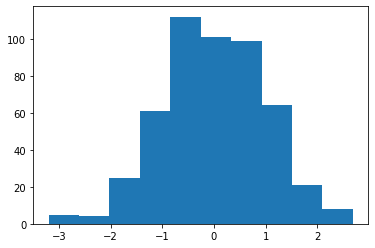

In [123]:
plt.hist(z_group["Age"])

In [124]:
# Reemplazar NA
fill_na_mean = lambda x: x.fillna(x.mean())
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,138.209195,25.852286,41.812149,20574.725197
1,173.965542,103.027799,22.431003,16489.829759
2,175.942595,61.609258,29.498286,15309.866907
3,141.039922,87.990305,37.969720,14810.741947
4,123.928023,45.857647,40.356139,16768.752061
...,...,...,...,...
495,167.972268,70.010069,11.430661,19447.093128
496,131.345244,122.855428,21.417202,22984.080180
497,134.203284,13.969131,24.596771,20929.190316
498,154.461709,115.823174,38.198718,23225.570879


## Operaciones diversas utilizadas

In [125]:
# 1er fila de cada grupo
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,138.209195,25.852286,41.812149,20574.725197
1,Female,Rich,173.965542,103.027799,22.431003,16489.829759
3,Male,Rich,141.039922,87.990305,37.969720,14810.741947
5,Male,Poor,183.107473,24.933517,25.106238,11126.562099
10,Female,Poor,129.347679,6.748794,13.679111,17629.049560
20,Female,Middle Class,183.227541,38.449614,29.184042,14597.794597


In [126]:
# ultima fila de cada grupo
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
492,Male,Middle Class,109.586029,112.767129,12.069398,18261.874266
493,Female,Poor,153.283123,101.752133,43.800506,17877.234085
496,Male,Rich,131.345244,122.855428,21.417202,22984.080180
497,Male,Poor,134.203284,13.969131,24.596771,20929.190316
498,Female,Middle Class,154.461709,115.823174,38.198718,23225.570879
499,Female,Rich,171.725837,68.048413,26.500272,20234.067954


In [127]:
# Fila n-esima
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.193520  90.725264  14.253279  21289.376052
       Poor             138.124173  59.091208  49.544306  19402.003194
       Rich             149.911834  23.674227  43.658159  17830.145085
Male   Middle Class     150.827214  17.139860  39.188114  16747.568374
       Poor             125.839385 -19.066811  56.538056  19704.235192
       Rich             162.739414  85.801402  15.210322  17845.921274

In [128]:
# Ordenar según categorías
data_sorted = data.sort_values(["Age", "Income"])
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
153,Male,Middle Class,108.227994,52.674936,-6.637424,16203.274277
144,Male,Poor,153.365228,110.956956,-5.922839,18101.480372
257,Male,Middle Class,179.058456,37.708499,-5.418570,16689.614123
316,Male,Rich,226.567258,-1.175245,-5.217393,19121.071730
424,Male,Rich,194.360502,-10.337657,-0.355836,13468.581995
293,Female,Poor,115.923196,37.403565,0.011607,16424.925393
457,Female,Middle Class,213.434272,5.783164,1.836801,17504.929794
256,Male,Middle Class,158.995371,53.287858,2.518126,22856.095380
310,Male,Poor,174.128599,-0.357833,2.875429,14487.005222
134,Female,Rich,163.461897,87.844756,2.983735,13895.193724


In [129]:
# Extraer agrupación por categoría
age_grouped = data_sorted.groupby("Gender")
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
153,Male,Middle Class,108.227994,52.674936,-6.637424,16203.274277
293,Female,Poor,115.923196,37.403565,0.011607,16424.925393


In [130]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
207,Female,Poor,164.906434,32.836373,59.304462,15778.852676
375,Male,Middle Class,147.037413,106.502237,60.705309,19963.571239


# Conjunto de entrenamiento y testing

Dividír un DataSet en 2 conjuntos: 
* 80% de los datos para entrenamiento con los que se realiza el modelo.
* 20% de los datos para testing para comprobar el modelo.

In [131]:
data = pd.read_csv('../python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')
len(data)

3333

## Dividir utilizando la Distribución Normal

In [132]:
a = np.random.randn(len(data))

(array([ 21.,  78., 284., 615., 919., 727., 472., 175.,  37.,   5.]),
 array([-3.20823335, -2.53516258, -1.86209181, -1.18902104, -0.51595027,
         0.1571205 ,  0.83019127,  1.50326204,  2.17633281,  2.84940358,
         3.52247435]),
 <BarContainer object of 10 artists>)

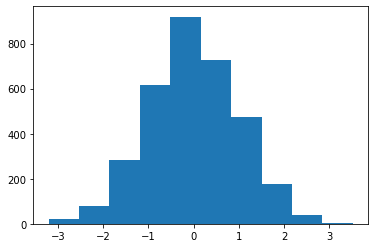

In [133]:
plt.hist(a)

(array([ 712.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2621.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

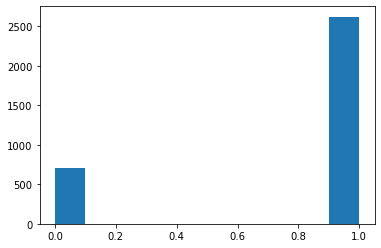

In [134]:
check = (a < 0.8)
plt.hist(check.astype(int))

In [135]:
training = data[check]
testing = data[~check]

In [136]:
len(training)

2621

In [137]:
len(testing)

712

## Dividir utilizando la libreria sklearn

In [138]:
import sklearn
from sklearn.model_selection import train_test_split


In [139]:
train, test = train_test_split(data, test_size=0.2) # size = porcentaje de test

In [140]:
len(train)

2666

In [141]:
len(test)

667

## Dividir utilizando una función de shuffle

In [142]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [143]:
# Mezclar la filas aleatoriamente
data = sklearn.utils.shuffle(data)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2422,KY,38,408,352-9947,no,yes,36,115.4,98,19.62,...,83,14.13,184.7,79,8.31,15.2,6,4.10,2,False.
2889,CT,93,415,404-4809,no,no,0,271.1,101,46.09,...,133,20.18,145.4,103,6.54,8.4,6,2.27,1,True.
1497,MT,114,510,393-3274,no,no,0,189.8,101,32.27,...,80,12.55,172.7,121,7.77,10.6,5,2.86,1,False.
950,AK,108,415,330-5462,no,no,0,103.0,129,17.51,...,103,20.60,170.2,89,7.66,7.9,3,2.13,1,False.
1160,TX,47,408,392-6841,no,yes,28,112.2,70,19.07,...,106,13.16,166.7,105,7.50,10.6,2,2.86,0,False.


In [144]:
# Cortar para training y test
cut_id = int(0.8*len(data))
train_data = data[:cut_id]
test_data = data[cut_id:]

In [145]:
len(train_data)

2666

In [146]:
len(test_data)

667